In [3]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

## Dataset

In [4]:
df = pd.read_csv('data/online_shoppers_intention.csv')

In [5]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
df.shape

(12330, 18)

## Explication des variables

The dataset consists of features belonging to 12,330 sessions. 

Une **session** désigne une visite individuelle, initiée par un utilisateur. Une session est définie comme l’ensemble des interactions d’un utilisateur dans un laps de temps donné sur votre site web. Une session prend fin après 30 minutes d’inactivité de la part du visiteur sur votre site. Si le visiteur quitte le site et revient dans les 30 minutes qui suivent, alors Google ne comptabilise qu’une seule session.The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.

The value of **Bounce Rate** feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
BR = Total One page visits / Total Entrance Visits (the percentage of single-engagement sessions)

The value of **Exit Rate** looks at the number of people who exit your website after landing on a page and compares it to the total number of views the page received. ER = Total Exit from page / Total Visits to page (the percentage of exits on a page)

Exit rate is the percentage of visits that were the last in the session whereas bounce rate is the percentage of visits that were the only one of the session. (More info here : https://cxl.com/guides/bounce-rate/bounce-rate-vs-exit-rate/)

**Page Value** is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site’s revenue.




In [7]:
df_all = df

## Clean dataset

### 1. Delete all null values from the dataset


In [8]:
# Drop null values
df_all.dropna(inplace=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12316 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12316 non-null float64
Administrative_Duration    12316 non-null float64
Informational              12316 non-null float64
Informational_Duration     12316 non-null float64
ProductRelated             12316 non-null float64
ProductRelated_Duration    12316 non-null float64
BounceRates                12316 non-null float64
ExitRates                  12316 non-null float64
PageValues                 12316 non-null float64
SpecialDay                 12316 non-null float64
Month                      12316 non-null object
OperatingSystems           12316 non-null int64
Browser                    12316 non-null int64
Region                     12316 non-null int64
TrafficType                12316 non-null int64
VisitorType                12316 non-null object
Weekend                    12316 non-null bool
Revenue                    12316 non-null bool
dtypes:

## Data cleaning
* retirer les valeurs aberrantes: "product related duration" = nombre de produits vus trop �lev�s(scarpping)
* retirer les gens qui ne sont pas rest� sur le site : aucune action le site


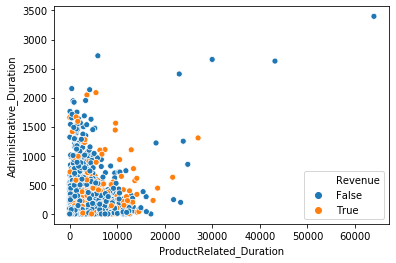

In [9]:
#on retire les valeurs aberrantes vision de produits
ProdDuration = sns.scatterplot(x="ProductRelated_Duration", y="Administrative_Duration", hue="Revenue", data=df_all)

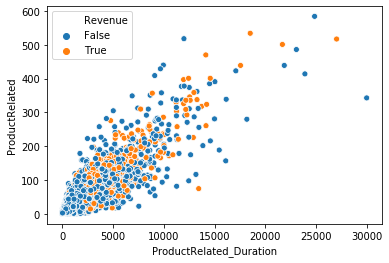

In [10]:
#cleaning en enlevant les valeurs aberrantes
df_clean = df_all[(df_all["ProductRelated"] < 600) & (df_all["ProductRelated_Duration"] < 30000)]
ProdDuration_CLEAN = sns.scatterplot(x="ProductRelated_Duration", y="ProductRelated", hue="Revenue", data=df_clean)

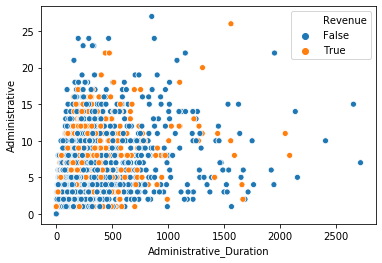

In [11]:
#clean des outliers
AdminDuration_CLEAN = sns.scatterplot(x="Administrative_Duration", y="Administrative", hue="Revenue", data=df_clean)

In [12]:
df_clean = df_clean[(df_clean["Administrative_Duration"] < 2250)]

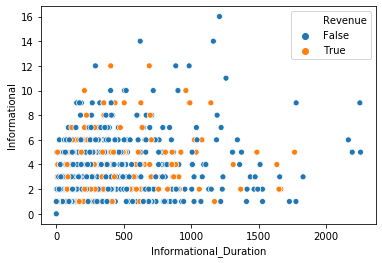

In [13]:
information_duration = sns.scatterplot(x="Informational_Duration", y="Informational", hue="Revenue", data=df_clean)

In [14]:
#enlever  les visiteurs qui sont rest�s tr�s longtemps sur les pages infos et pas sur les produits(pas des consommateurs � priori)
df_clean = df_clean[(df_clean["Informational_Duration"] < 2000)]


In [15]:
# visiteurs ne sont pas all�s sur des pages cat�goris�s donc l'analyse de leur comportement est impossible
df_clean = df_clean[(df_clean["ProductRelated"] > 0 ) | (df_clean["Administrative"] > 0) | (df_clean["Informational"] > 0)]
print(df_clean.shape)

(12301, 18)


### 3. One hot Code "Month" and "VisitorType" columns


In [16]:
# check all the month values
print('Month: ', df_clean['Month'].unique())


Month:  ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


In [17]:
# use pd.concat to join the new columns with the original dataframe
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['Month'], prefix='Month')],axis=1)
df_clean = pd.concat([df_clean,pd.get_dummies(df_clean['VisitorType'], prefix='VisitorType')],axis=1)

# drop the original 'Month' column (don't need it anymore)
#df_all.drop(['Month', 'VisitorType'],axis=1, inplace=True)
df_clean.head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


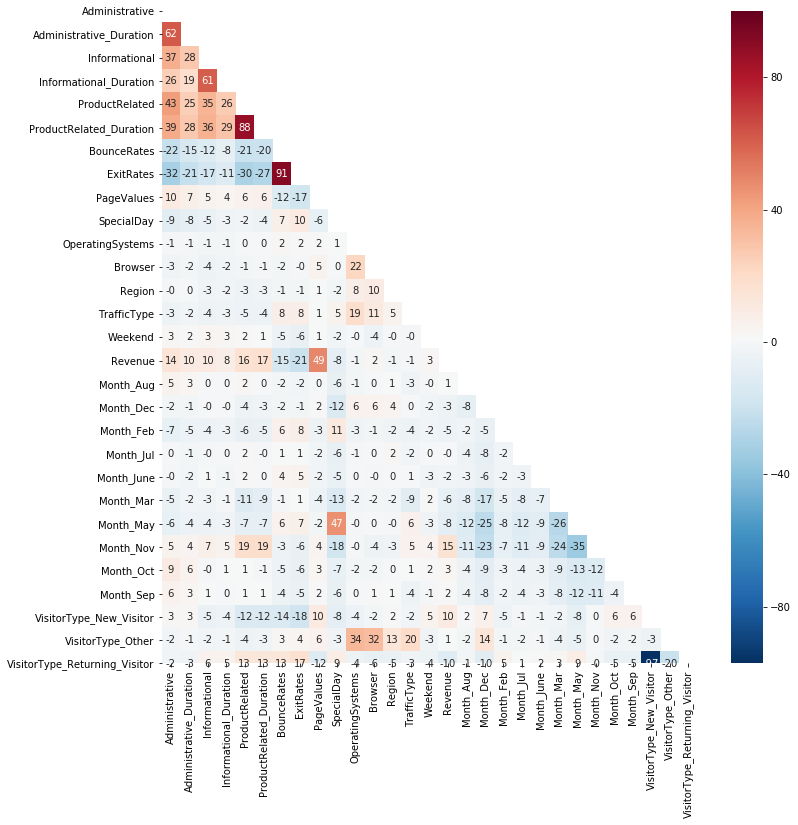

In [18]:
# Generate a mask for the upper triangle
z = np.zeros_like(df_clean.corr(), dtype=np.bool)
z[np.triu_indices_from(z)] = True

plt.figure(figsize=(12,12))
sns.heatmap(df_clean.corr()*100, mask=z, cmap="RdBu_r", annot=True, fmt='.0f')
plt.show()

## Data analysis  et Visualisation sur les données au comportement des visiteurs

In [19]:
#regardons la part des revenus engendr�s sur le total 
revenue = df_clean['Revenue'].value_counts()
print(revenue)

False    10393
True      1908
Name: Revenue, dtype: int64


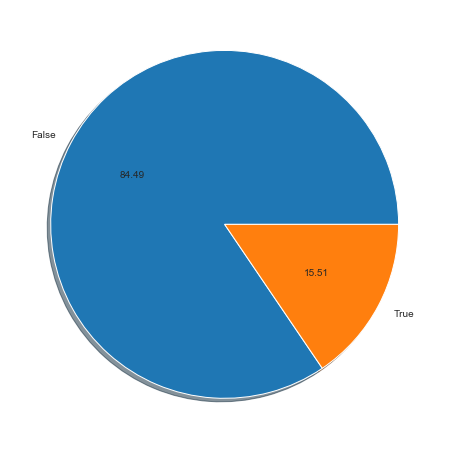

In [20]:
#visualisation
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
x= revenue.index
y = revenue.values
plt.pie(y,labels=x,autopct='%.2f',shadow = True)
plt.show()

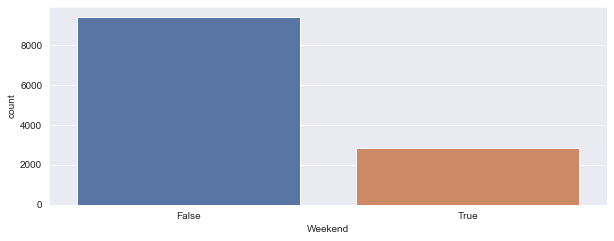

In [21]:
#people visiting on weekend or week 
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.set(style="dark")
ax = sns.countplot(x="Weekend",data=df_clean)

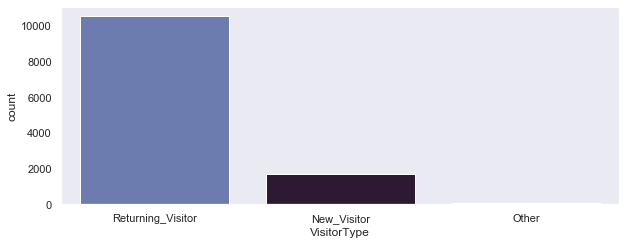

In [22]:
#type of visitor
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.set(style="dark")
ax = sns.countplot(x="VisitorType", data=df_clean, palette = 'twilight')

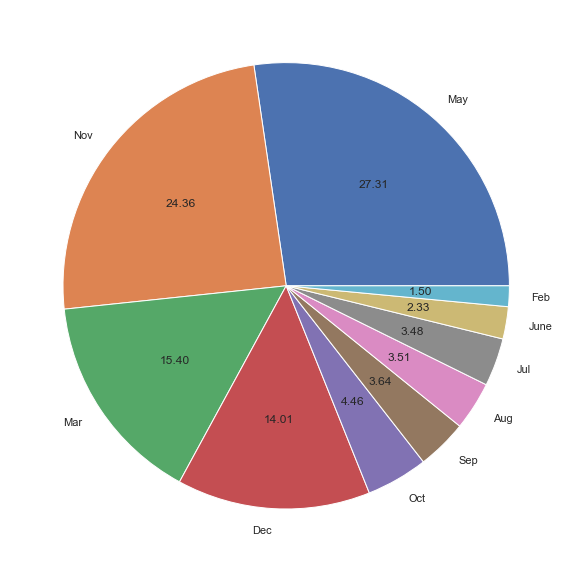

In [23]:
#by months
months_value=df_clean['Month'].value_counts()
sns.set_style('darkgrid')
plt.figure(figsize=(10,18))
x= months_value.index
y = months_value.values
plt.pie(y,labels=x,autopct='%.2f')
plt.show()

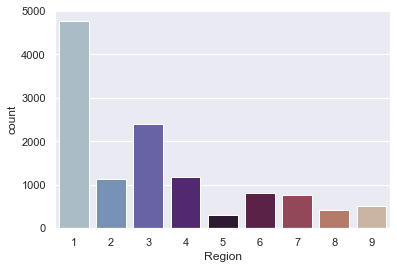

In [24]:
#by region
region = df_clean['Region']
ax = sns.countplot(x=df_clean['Region'],data=df_clean,palette = 'twilight')

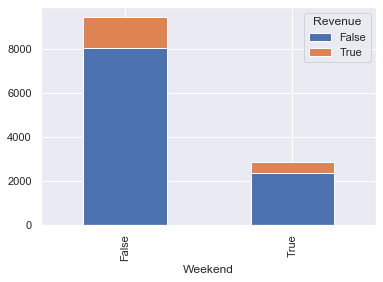

In [25]:
#week end = more revenue?: tableau crois�
df_cross= pd.crosstab(df_clean['Weekend'],df_clean['Revenue'])
df_cross.plot(kind='bar',stacked='true')
plt.show()

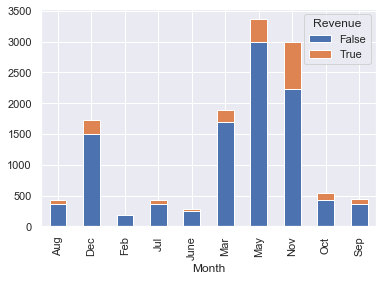

In [26]:
 #tableau crois�

df_cross= pd.crosstab(df_clean['Month'],df_clean['Revenue'])
df_cross.plot(kind='bar',stacked='true')

plt.show()


## analyses des données sur les pages KPI WEB

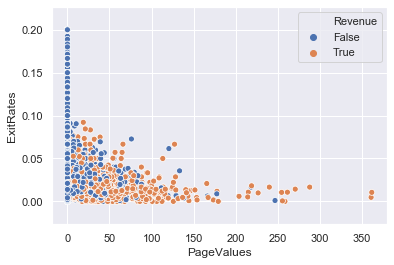

In [27]:
sns.scatterplot(x="PageValues", y="ExitRates", hue="Revenue", data=df_clean)

* plus la moyenne valeur de la page visité augmente plus il ya des revenus engendrés

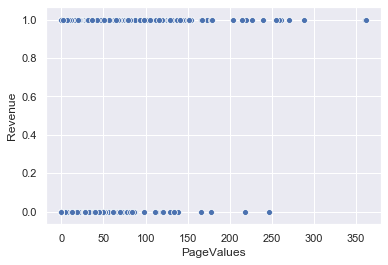

In [28]:
#les gens qui ont fait l'achat ont tendance à visiter des pages avec des valeurs plus grandes
sns.scatterplot(x="PageValues", y="Revenue", data=df_clean)

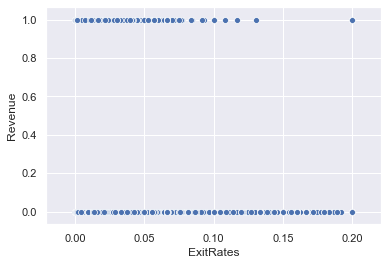

In [29]:
#les gens qui ont fait l'achat ont tendance à visiter des pages avec un exit rate plus bas 
sns.scatterplot(x="ExitRates", y="Revenue", data=df_clean)

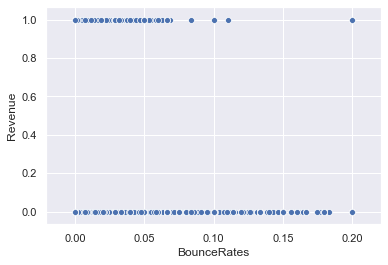

In [30]:
#les gens qui ont fait l'achat ont tendance à visiter des pages avec un BounceRate plus bas 
sns.scatterplot(x="BounceRates", y="Revenue", data=df_clean)

## Implement SVM model

In [31]:
#transformation pour le model suppression des 
df_clean.drop(['Month', 'VisitorType'],axis=1, inplace=True)

### First trial with all the columns


In [32]:
# split dependent and independent variables
X = df_clean.drop(['Revenue'], axis=1)
y = df_clean['Revenue']

# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize SVM instance
clf = LinearSVC(random_state=333)

# train the model
clf.fit(X_train, y_train)

C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=333, tol=0.0001,
          verbose=0)

In [33]:
# use the trained model to predict
pred = clf.predict(X_test)


In [34]:
# calculate accuracy
print("accuracy score: ", (accuracy_score(y_test, pred)*100).round(2), "%")


accuracy score:  81.7 %


In [35]:
# check coefficient
print(X.columns)
print(clf.coef_)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')
[[ 0.05790133  0.01427915 -0.00624034 -0.00116498 -0.02542793 -0.00358641
  -0.41972503 -0.74034181  0.04815402 -0.07296739  0.0045883  -0.02246979
   0.00604419  0.00339806  0.06659716  0.07621081 -0.08679829 -0.08570971
  -0.08245167  0.06132019 -0.34566983 -0.2541693   0.06521895 -0.0151607
   0.09416381 -0.13255655 -0.23606281 -0.20442637]]


In [36]:
# split dependent and independent variables
X = df_clean.drop(['Revenue', 'ProductRelated_Duration', 'Region', \
             'TrafficType'], axis=1)
y = df_clean['Revenue']

# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize SVM instance
clf = LinearSVC(random_state=333)

# train the model
clf.fit(X_train, y_train)

C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=333, tol=0.0001,
          verbose=0)

In [37]:
# use the trained model to predict
pred = clf.predict(X_test)


In [38]:
# calculate accuracy
print("accuracy score: ", (accuracy_score(y_test, pred)*100).round(2), "%")


accuracy score:  84.7 %


## Create prediction model
In the dateset, there are two kind of data:

Those that we can obtain when they arrive on the website, e.g, Month, Weekend, etc.
Those that we obtain ONLY after users leave the page, e.g., Bounce Rate, Exit Rate, etc.
To predict their behaviour, we can only build the model with the data that we can obtain when they arrive on the website.

In [39]:
df_clean.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')

In [40]:
X = df_clean.drop(['Administrative', 'Administrative_Duration', 'Informational', \
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', \
       'BounceRates', 'ExitRates', 'PageValues', 'Revenue'], axis=1)
y = df_clean['Revenue']

# split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# initialize SVM instance
clf = LinearSVC(random_state=333)

# train the model
clf.fit(X_train, y_train)

C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=333, tol=0.0001,
          verbose=0)

In [41]:
# use the trained model to predict
pred = clf.predict(X_test)

In [42]:
# calculate accuracy
print("accuracy score: ", (accuracy_score(y_test, pred)*100).round(2), "%")

accuracy score:  84.58 %


In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[3434,    0],
       [ 626,    0]], dtype=int64)